In [1]:
import cv2
import os
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
source_images = os.path.join("train")
list_of_images = np.array(glob(os.path.join(source_images, "*.tif")))
labels = pd.read_csv('train_labels.csv')

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
id       220025 non-null object
label    220025 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [4]:
width = 128
height = 128

In [5]:
n_samples = 12000
indexes = np.random.choice(len(list_of_images), size=n_samples, replace=False)

y = labels['label'].iloc[indexes].values

X = []
for img in list_of_images[indexes]:
    base = os.path.basename(img)
    full_size_image = cv2.imread(img)
    X.append(cv2.resize(full_size_image, (width,height), interpolation=cv2.INTER_CUBIC))

In [6]:
X = np.array(X).reshape(len(X),X[0].size)

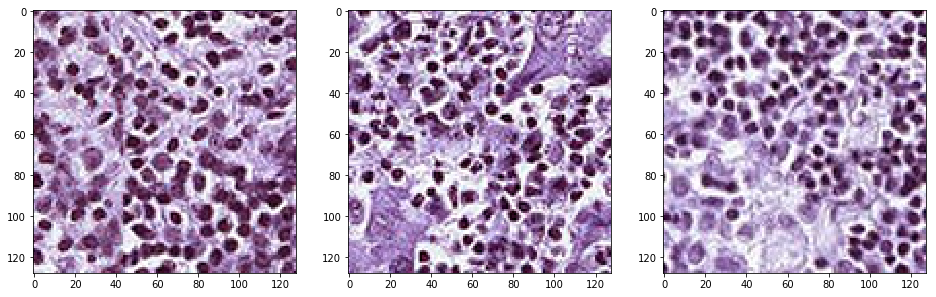

In [7]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(X[0].reshape(width,height,3))

plt.subplot(132)
plt.imshow(X[1].reshape(width,height,3))

plt.subplot(133)
plt.imshow(X[2].reshape(width,height,3));

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

In [9]:
LogReg_model = LogisticRegression(random_state=0, solver='sag').fit(X_train, y_train)

/home/izinizik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [10]:
LogReg_model.score(X_valid, y_valid)

0.5206666666666667

In [11]:
y_scores = LogReg_model.predict_proba(X_valid)[:,1]

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_scores)

In [13]:
roc_auc = roc_auc_score(y_valid, y_scores)

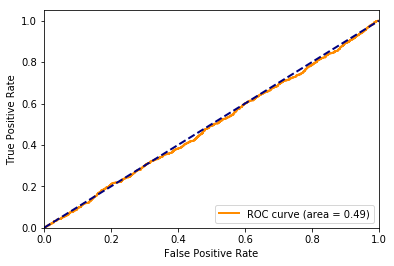

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()